<a href="https://colab.research.google.com/github/varunsh20/Covid-19-prediction-using-deep-learning/blob/main/Covid_19_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing modules
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Dense,Dropout,Flatten

In [ ]:
from google.colab import drive

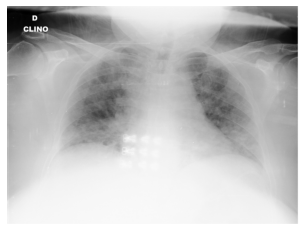

In [ ]:
from matplotlib import pyplot as plt
#Corona patient X-ray
img = plt.imread('/content/drive/My Drive/Colab Notebooks/X-ray dataset/Dataset/Train/Covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg')

img = image.img_to_array(img)/255
plt.axis('off')
plt.imshow(img)

**Creating a generator object**

In [ ]:
#Using data augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255,
                               width_shift_range=0.2, 
                               shear_range=0.2,
                                zoom_range=0.2,                   
                               rotation_range=40,
                               validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1.0/255)

In [ ]:
train_gen = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/X-ray dataset/Dataset/Train',
                                              target_size=(224,224),
                                              class_mode='binary',
                                              batch_size=32,
                                              subset='training')

val_gen = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/X-ray dataset/Dataset/Train',
                                              target_size=(224,224),
                                              class_mode='binary',
                                              batch_size=32,
                                            subset='validation')


Found 240 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
train_gen.class_indices

{'Covid': 0, 'Normal': 1}

**CNN based model**

In [ ]:
model = models.Sequential()

model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 54, 54, 64)       

In [ ]:
model.compile('adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
hist = model.fit_generator(train_gen,epochs=40,validation_data=val_gen)

Epoch 1/40
8/8 [==============================] - 10s 1s/step - loss: 0.7747 - accuracy: 0.5458 - val_loss: 0.6878 - val_accuracy: 0.5833
Epoch 2/40
8/8 [==============================] - 9s 1s/step - loss: 0.6874 - accuracy: 0.5500 - val_loss: 0.6878 - val_accuracy: 0.5000
Epoch 3/40
8/8 [==============================] - 10s 1s/step - loss: 0.6879 - accuracy: 0.5583 - val_loss: 0.6803 - val_accuracy: 0.7667
Epoch 4/40
8/8 [==============================] - 9s 1s/step - loss: 0.6195 - accuracy: 0.6917 - val_loss: 0.6009 - val_accuracy: 0.5833
Epoch 5/40
8/8 [==============================] - 9s 1s/step - loss: 0.5437 - accuracy: 0.7083 - val_loss: 0.4384 - val_accuracy: 0.9333
Epoch 6/40
8/8 [==============================] - 10s 1s/step - loss: 0.4584 - accuracy: 0.7917 - val_loss: 0.3736 - val_accuracy: 0.9000
Epoch 7/40
8/8 [==============================] - 9s 1s/step - loss: 0.4729 - accuracy: 0.7875 - val_loss: 0.3165 - val_accuracy: 0.9167
Epoch 8/40
8/8 [======================

The model accuracy is almost 97% on training data and 98% on validation data

**Plotting loss curve**

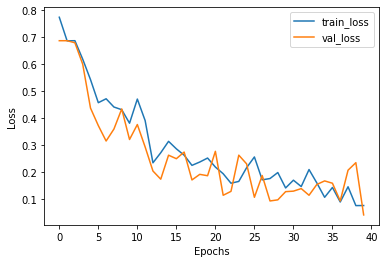

In [ ]:
plt.plot(hist.history['loss'],label='train_loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Plotting accuracy curve**

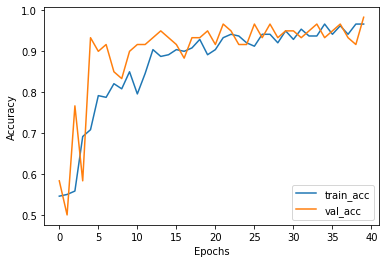

In [ ]:
plt.plot(hist.history['accuracy'],label='train_acc')
plt.plot(hist.history['val_accuracy'],label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.save('my_model1.h5')
model.save_weights('weights1.h5')

**Making Predictions**

Predicting covid cases

In [ ]:
y_test_covid=[]
y_actual_covid=[]

In [ ]:
path_covid='/content/drive/My Drive/Colab Notebooks/X-ray dataset/Dataset/Test/Covid/'
for i in os.listdir(path_covid):
  img = image.load_img(path_covid+i,target_size=(224,224))
  img = np.expand_dims(img,axis=0)
  prediction = model.predict_classes(img)
  y_test_covid.append(prediction[0,0])
  y_actual_covid.append(0)   

In [ ]:
#Converting predictions into a numpy array
y_test_covid = np.array(y_test_covid)
y_actual_covid = np.array(y_actual_covid)

**Calculating score**

In [ ]:
score = accuracy_score(y_actual_covid,y_test_covid)
print(score)

0.9803921568627451


**Creating a confusion matrix**

In [ ]:
cm = confusion_matrix(y_actual_covid,y_test_covid)
print(cm)

[[100   2]
 [  0   0]]


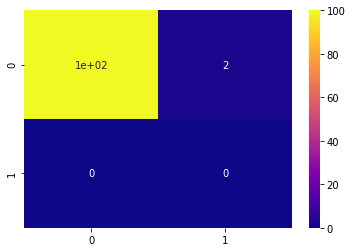

In [ ]:
sns.heatmap(cm,cmap='plasma',annot=True)

Predicting normal cases

In [ ]:
y_test_normal=[]
y_actual_normal=[]

In [ ]:
path_normal='/content/drive/My Drive/Colab Notebooks/X-ray dataset/Dataset/Test/Normal/'
for i in os.listdir(path_normal):
  img_n = image.load_img(path_normal+i,target_size=(224,224))
  img_n = np.expand_dims(img_n,axis=0)
  prediction_n = model.predict_classes(img_n)
  y_test_normal.append(prediction_n[0,0])
  y_actual_normal.append(1)   

In [ ]:
#Converting predictions into a numpy array
y_test_normal = np.array(y_test_normal)
y_actual_normal = np.array(y_actual_normal)

**Checking score**

In [ ]:
score = accuracy_score(y_actual_normal,y_test_normal)
print(score)                                                        

0.8627450980392157


Here we got less score because normal folder has less number of images.

**Creating a confusion matrix**

In [ ]:
cm1 = confusion_matrix(y_actual_normal,y_test_normal)
print(cm1)

[[ 0  0]
 [ 7 44]]


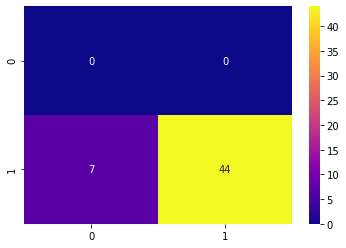

In [ ]:
sns.heatmap(cm1,cmap='plasma',annot=True)